<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-06-01-tree-based-models-gradient-boosted-survival-model-coxph-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1HX868sY0Bxt_Oa0C8F5UOn7Rlkots3o3&usp=drive_fs)

# 3.6.1  Cox Proportional Hazards-Based Gradient Boosting


The Cox Proportional Hazards-Based Gradient Boosting Model is a powerful machine learning technique used in survival analysis to predict time-to-event outcomes (e.g., death, failure, churn) while handling censored data. It combines the strengths of Cox proportional hazards regression with the predictive power of gradient boosting, enabling flexible, non-linear modeling of survival risks.

This model is particularly useful when traditional linear assumptions of the Cox model are too restrictive, and more complex relationships between features and survival time exist.

## Overview

Survival analysis aims to model the time until an event occurs, with the challenge that some subjects may not experience the event during the study period (right-censored data). The **Cox proportional hazards (Cox PH) model** is a semi-parametric regression model widely used for such tasks.

However, the classical Cox model assumes:
- Linear effects of covariates
- Proportional hazards
- No interactions unless explicitly added

To overcome these limitations, **gradient boosting**—a machine learning ensemble method—can be adapted to optimize the **partial likelihood** of the Cox model. This results in a **boosted Cox model** that learns complex, non-linear patterns in the data by sequentially fitting weak learners (typically decision trees) to improve survival risk predictions.

This approach is implemented in libraries like **XGBoost**, **LightGBM**, and **pyGBM**, using a custom objective function based on the **Cox partial log-likelihood**.

### Key Features

| Feature | Description |
|--------|-------------|
| **Handles Censored Data** | Properly accounts for right-censored observations using partial likelihood. |
| **Non-linear Relationships** | Can capture non-linear effects and feature interactions without manual specification. |
| **Feature Selection** | Built-in importance scoring helps identify influential predictors. |
| **Ensemble Learning** | Combines many weak models (trees) into a strong predictor via boosting. |
| **Flexible Functional Form** | Does not assume linearity; adapts to complex data structures. |
| **Optimizes Cox Objective** | Uses the **negative log partial likelihood** as the loss function. |

### How It Works

1. **Cox Proportional Hazards Model (Baseline)**

The Cox model defines the hazard function for individual $ i $ at time $ t $ as:

$$
h_i(t) = h_0(t) \cdot \exp(\mathbf{x}_i^\top \boldsymbol{\beta})
$$

Where:
- $ h_i(t) $: hazard rate for individual $ i $
- $ h_0(t) $: baseline hazard (non-parametric, unspecified)
- $ \mathbf{x}_i $: vector of covariates
- $ \boldsymbol{\beta} $: coefficients (estimated from data)

The **partial log-likelihood** (used for estimation) is:

$$
\ell(\boldsymbol{\beta}) = \sum_{i: \delta_i = 1} \left[ \mathbf{x}_i^\top \boldsymbol{\beta} - \log\left( \sum_{j \in R(t_i)} \exp(\mathbf{x}_j^\top \boldsymbol{\beta}) \right) \right]
$$

Where:
- $ \delta_i = 1 $ if event observed (not censored)
- $ R(t_i) $: risk set at time $ t_i $ (individuals still under observation just before $ t_i $)

2. **Gradient Boosting Framework with Cox Loss**

Instead of estimating $ \boldsymbol{\beta} $ via maximum likelihood, **gradient boosting** builds a prediction function $ f(\mathbf{x}) $ iteratively:

$$
F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \nu \cdot f_m(\mathbf{x})
$$

Where:
- $ F_m(\mathbf{x}) $: cumulative model after $ m $-th iteration
- $ f_m(\mathbf{x}) $: weak learner (e.g., decision tree) fitted to pseudo-residuals
- $ \nu $: learning rate (shrinkage)

### Step-by-Step Process:

1. **Initialize** model $ F_0(\mathbf{x}) = 0 $ or a constant.
2. For $ m = 1 $ to $ M $:
   a. Compute **negative gradient** (pseudo-residuals) of Cox loss w.r.t. current predictions:
   $$ r_{im} = \delta_i \left[ \mathbf{x}_i - \frac{\sum_{j \in R(t_i)} \mathbf{x}_j \exp(F_{m-1}(\mathbf{x}_j))}{\sum_{j \in R(t_i)} \exp(F_{m-1}(\mathbf{x}_j))} \right] $$
   
   This represents the **score residual** or gradient for individual $ i $.

   b. Fit a **regression tree** $ f_m(\mathbf{x}) $ to the residuals $ r_{im} $.
   c. Update the model:
   
   $$ F_m(\mathbf{x}_i) = F_{m-1}(\mathbf{x}_i) + \nu \cdot f_m(\mathbf{x}_i) $$
      

3. Return final risk score $ \hat{f}(\mathbf{x}) = F_M(\mathbf{x}) $

The output $ \hat{f}(\mathbf{x}) $ is interpreted as the **log partial hazard** — higher values indicate higher risk.

### Advantages

| Advantage | Explanation |
|--------|-------------|
| **Handles Non-linearity** | Automatically captures non-linear and interactive effects without manual transformation. |
| **Robust to Outliers** | Tree-based models are less sensitive to extreme values. |
| **Built-in Regularization** | Techniques like shrinkage, subsampling, and tree depth control prevent overfitting. |
| **High Predictive Accuracy** | Often outperforms traditional Cox models on complex datasets. |
| **Feature Importance** | Provides interpretable metrics (e.g., gain, split count) for understanding key predictors. |
| **Scalable** | Efficient implementations in XGBoost/LightGBM handle large datasets. |


### Limitations

| Limitation | Explanation |
|----------|-------------|
| **Assumes Proportional Hazards** | Still relies on PH assumption unless extended (e.g., time-varying effects added manually). |
| **Black-Box Nature** | Less interpretable than standard Cox models; harder to explain individual predictions. |
| **Computationally Intensive** | Training can be slow with many iterations or large datasets. |
| **Requires Careful Tuning** | Hyperparameters (learning rate, depth, etc.) need optimization. |
| **No Direct Survival Time Prediction** | Outputs risk scores, not survival times or curves (unless calibrated). |
| **Limited Software Support** | Not all boosting libraries support survival objectives natively. |


### Use Cases

- Medical research: Predict patient survival after treatment
- Reliability engineering: Time until machine failure
- Customer analytics: Churn prediction in subscription services
- Finance: Time until loan default

## Cox Proportional Hazards-Based Gradient Boosting Model in Python

The Cox Proportional Hazards-Based Gradient Boosting model adapts gradient boosting for survival analysis. It uses a Cox-specific objective function to handle censored data and predict risk scores, combining the flexibility of boosting with the principles of Cox regression for time-to-event outcomes in Python.

While libraries like {CoxBoos}t are specifically designed for boosting with the Cox model in R, we choose to use {XGBoost} with  coustom objective functions in Python for Cox Proportional Hazards-Based Gradient Boosting.

1. `Performance and Scalability`: XGBoost is known for its high performance and efficiency, especially on large datasets. It's highly optimized and can leverage multi-threading and distributed computing.

2. `Flexibility`: XGBoost is a general-purpose gradient boosting framework that allows for custom objective functions and evaluation metrics. This makes it adaptable to various tasks, including survival analysis with the Cox objective.

3. `Community and Ecosystem`: XGBoost has a large and active community, extensive documentation, and integrates well with the broader Python data science ecosystem (NumPy, pandas, scikit-learn, etc.).

4. `Availability in Python`: While CoxBoost is primarily an R package, XGBoost is readily available and widely used in Python, which is a popular language for machine learning.

6. `Built-in Survival Objectiv`e: XGBoost has a built-in survival:cox objective function, which simplifies the implementation of Cox proportional hazards-based boosting compared to manually defining the gradient and Hessian in other general boosting frameworks.




In [37]:
%pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=77299389c70488e07d84524a99018aff3c8af128c07c0fcb37d60d152fdf1f58
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


### Data  and Data Preparation

The lung cancer dataset contains information on patient survival, including time to death or censoring, and various clinical factors such as age, sex, and performance status. It's commonly used for survival analysis examples.

The  code below loads the lung cancer dataset, splits it into training and testing sets, and prepares the data for survival analysis by separating the time, status, and predictor variables. It also includes verification steps to ensure the data is ready for modeling.

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from lifelines.datasets import load_lung

# Load the lung dataset from lifelines
lung_complete = load_lung()

# Remove missing values (load_lung already handles this, but as per R code, explicitly checking)
lung_complete.dropna(inplace=True)

# Split into 70% training and 30% testing
train_data, test_data = train_test_split(lung_complete, test_size=0.3, random_state=123)

# Training data
time_train = train_data['time']
status_train = train_data['status']
X_train = train_data.drop(columns=['time', 'status'])
X_train_matrix = X_train.values # Convert to numpy array

# Test data
time_test = test_data['time']
status_test = test_data['status']
X_test = test_data.drop(columns=['time', 'status'])
X_test_matrix = X_test.values # Convert to numpy array

# Verify shapes and data types
print(f"Training set: time = {len(time_train)}, status = {len(status_train)}, X rows = {X_train_matrix.shape[0]}")
print(f"Test set: time = {len(time_test)}, status = {len(status_test)}, X rows = {X_test_matrix.shape[0]}")
print("Training data summary:")
display(X_train.describe())
print(f"Any NA in X_train_matrix: {np.isnan(X_train_matrix).any()}")
print(f"Any infinite in X_train_matrix: {np.isinf(X_train_matrix).any()}")
print("Correlation matrix of X_train:")
display(X_train.corr())

Training set: time = 116, status = 116, X rows = 116
Test set: time = 51, status = 51, X rows = 51
Training data summary:


,inst,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,116.000000,116.000000,116.00000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,10.068966,62.172414,1.37931,0.956897,82.241379,79.827586,908.284483,9.991379
std,7.831624,9.255105,0.48732,0.727022,12.926966,14.743179,380.089916,13.641685
min,1.000000,39.000000,1.00000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,3.000000,56.000000,1.00000,0.000000,77.500000,70.000000,665.000000,0.000000
50%,10.500000,63.000000,1.00000,1.000000,80.000000,80.000000,975.000000,7.500000
75%,13.500000,69.000000,2.00000,1.000000,90.000000,90.000000,1106.250000,17.000000
max,32.000000,82.000000,2.00000,3.000000,100.000000,100.000000,2450.000000,68.000000


Any NA in X_train_matrix: False
Any infinite in X_train_matrix: False
Correlation matrix of X_train:


,inst,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
inst,1.000000,0.092451,0.056882,0.153249,-0.094304,-0.026255,0.157400,-0.148942
age,0.092451,1.000000,-0.103314,0.333243,-0.349949,-0.256604,-0.192732,0.021087
sex,0.056882,-0.103314,1.000000,0.046548,-0.080917,0.021285,-0.160299,-0.111995
ph.ecog,0.153249,0.333243,0.046548,1.000000,-0.831606,-0.552361,-0.064622,0.174440
ph.karno,-0.094304,-0.349949,-0.080917,-0.831606,1.000000,0.540435,0.106463,-0.139438
pat.karno,-0.026255,-0.256604,0.021285,-0.552361,0.540435,1.000000,0.223943,-0.178571
meal.cal,0.157400,-0.192732,-0.160299,-0.064622,0.106463,0.223943,1.000000,-0.183803
wt.loss,-0.148942,0.021087,-0.111995,0.174440,-0.139438,-0.178571,-0.183803,1.000000


### Fit CoxBoost Model

To fit CoxBoost model in Python, we will use{XGBoost} with a custom objective function that approximates the negative Cox partial log-likelihood.

This requires defining:

- A custom objective function (`cox_objective`) that calculates the gradient and Hessian of the negative Cox partial log-likelihood.

- A custom evaluation metric (C-index) for monitoring training progress.
We will then train an xgb.Booster model using these custom functions.


In [70]:
import xgboost as xgb
import numpy as np
from lifelines.utils import concordance_index

# Custom objective function for Cox proportional hazards
# This is a simplified approximation of the negative partial log-likelihood gradient and Hessian
# based on http://reliawiki.org/doku.php?id=survival_analysis:cox_regression_with_python_and_xgboost
# and https://github.com/dmlc/xgboost/issues/1715
# Note: We are currently using the built-in 'survival:cox' objective in XGBoost,
# so this custom objective function is not being used in the training call below.
def cox_objective(predt, dtrain):
    """
    Custom objective function for Cox proportional hazards.
    Approximates the gradient and Hessian of the negative Cox partial log-likelihood.
    """
    y_true = dtrain.get_label() # This is the time-to-event or censoring time
    # In the R data (status 1=censored, 2=dead), we converted to Python (status 0=censored, 1=event)
    # So we need the event indicator (1 for event, 0 for censored)
    event_observed = dtrain.get_float_info('event_observed')

    # Sort by time in descending order for calculating risk set
    # Use argsort on negative time to get descending order
    order = np.argsort(-y_true)
    predt_sorted = predt[order]
    y_true_sorted = y_true[order]
    event_observed_sorted = event_observed[order]

    # Calculate the risk set sum (sum of exp(predt) for individuals at risk at each event time)
    # This can be done efficiently by taking cumulative sum in reverse order
    exp_predt_sorted = np.exp(predt_sorted)
    risk_set_sum = np.cumsum(exp_predt_sorted[::-1])[::-1] # Cumulative sum from the end

    # Calculate the gradient and Hessian
    # Gradient: delta_i - sum_{j in R(t_i)} exp(pred_j) / sum_{k in R(R(t_i)} exp(pred_k)
    # Hessian: sum_{j in R(t_i)} exp(pred_j) / sum_{k in R(t_i)} exp(pred_k) * (1 - sum_{j in R(t_i)} exp(pred_j) / sum_{k in R(t_i)} exp(pred_k))
    # This approximation is for gradient boosting, where we fit to residuals (negative gradient)

    # Simplified gradient and Hessian for approximation (negative gradient for boosting)
    # Based on the idea that gradient is related to observed events vs expected events in the risk set
    gradient = -event_observed_sorted + (event_observed_sorted * exp_predt_sorted) / risk_set_sum
    hessian = (event_observed_sorted * exp_predt_sorted * risk_set_sum - (event_observed_sorted * exp_predt_sorted)**2) / risk_set_sum**2

    # Need to return gradient and hessian in the original order
    reorder = np.argsort(order) # Get the indices to reorder back
    return gradient[reorder], hessian[reorder]


# Custom evaluation metric (C-index)
# This custom evaluation function is not being used directly in the xgb.train call below,
# but can be used manually after training to calculate C-index.
def cox_cindex_eval(predt, dtrain):
    """
    Custom evaluation metric: Concordance Index (C-index) for Cox proportional hazards.
    """
    y_true = dtrain.get_label()
    event_observed = dtrain.get_float_info('event_observed')
    # lifelines concordance_index expects event_times, event_observed, predicted_scores
    c_index = concordance_index(y_true, event_observed, predt)
    return 'c-index', c_index


### Prepare data for XGBoost using the built-in objective

In [71]:
# Prepare data for XGBoost using the built-in objective
# XGBoost DMatrix for survival analysis with 'survival:cox' objective
# requires 'label' to be the time and 'weight' to be the event indicator (1 for event, 0 for censored)
dtrain_builtin = xgb.DMatrix(X_train, label=time_train, weight=status_train.values)
dtest_builtin = xgb.DMatrix(X_test, label=time_test, weight=status_test.values)

### Train the Model

In [72]:
# Define XGBoost parameters for the built-in survival objective
params_builtin = {
    'objective': 'survival:cox',
    # Removed eval_metric from parameters to avoid errors during training
    'eta': 0.05, # Learning rate (shrinkage) - R's nu
    'max_depth': 3, # Maximum depth of trees
    'subsample': 0.8, # Fraction of samples used per tree
    'colsample_bytree': 0.8, # Fraction of features used per tree
    'seed': 123,
    'nthread': -1, # Use all available threads
    'tree_method': 'hist' # Use histogram-based tree construction for speed
}

# Number of boosting rounds (steps) - corresponds to R's stepno
num_boost_round = 100 # Start with 100 as in the R initial model


# Train the model using the built-in objective without evaluation metrics in the loop
print(f"Training XGBoost model with {num_boost_round} boosting rounds using built-in objective (without live evaluation)...")

initial_xgb_model = xgb.train(
    params_builtin,
    dtrain_builtin,
    num_boost_round=num_boost_round,
    # Pass only the DMatrix and name in evals
    evals=[(dtrain_builtin, 'train'), (dtest_builtin, 'eval')],
    # No custom_evals argument
    # No early_stopping_rounds for now
    verbose_eval=10 # Print progress
)

Training XGBoost model with 100 boosting rounds using built-in objective (without live evaluation)...
[0]	train-cox-nloglik:3.77214	eval-cox-nloglik:2.99298
[10]	train-cox-nloglik:3.71080	eval-cox-nloglik:2.99236
[20]	train-cox-nloglik:3.67331	eval-cox-nloglik:3.00721
[30]	train-cox-nloglik:3.64368	eval-cox-nloglik:3.03171
[40]	train-cox-nloglik:3.64680	eval-cox-nloglik:3.07131
[50]	train-cox-nloglik:3.64987	eval-cox-nloglik:3.09974
[60]	train-cox-nloglik:3.66156	eval-cox-nloglik:3.13622
[70]	train-cox-nloglik:3.65802	eval-cox-nloglik:3.15585
[80]	train-cox-nloglik:3.65137	eval-cox-nloglik:3.17883
[90]	train-cox-nloglik:3.64361	eval-cox-nloglik:3.19666
[99]	train-cox-nloglik:3.65311	eval-cox-nloglik:3.22773


### Pediction and Evaluation

In [73]:
# Now, manually calculate the C-index after training
print("\nCalculating C-index after training...")

# Get predictions (log partial hazards) from the trained model
train_preds = initial_xgb_model.predict(dtrain_builtin)
test_preds = initial_xgb_model.predict(dtest_builtin)

# Calculate C-index using lifelines' utility function
train_cindex = concordance_index(time_train, status_train, train_preds)
test_cindex = concordance_index(time_test, status_test, test_preds)

print(f"Initial XGBoost model C-index (Train): {round(train_cindex, 3)}")
print(f"Initial XGBoost model C-index (Test): {round(test_cindex, 3)}")


Calculating C-index after training...
Initial XGBoost model C-index (Train): 0.437
Initial XGBoost model C-index (Test): 0.498


### Integrated Brier Score (IBS)

Now, we calculate the Integrated Brier Score (IBS) for the trained XGBoost model on the test data. This metric assesses the accuracy of the predicted survival probabilities over time, accounting for censoring.

In [74]:
# Calculate IBS for the XGBoost model
# This requires predicting survival probabilities at specific times for the test set.
# XGBoost's survival objective predicts log(hazard ratio). To get survival probabilities,
# we need a baseline cumulative hazard function.
# S(t | x) = exp(-Lambda0(t) * exp(log_partial_hazard))
# Lambda0(t) is the baseline cumulative hazard function.

# First, get the predicted log partial hazards for the training and test data
train_preds_log_hazard = initial_xgb_model.predict(dtrain_builtin)
test_preds_log_hazard = initial_xgb_model.predict(dtest_builtin)

# Calculate the hazard ratios (exp of log partial hazards)
train_hazard_ratios = np.exp(train_preds_log_hazard)
test_hazard_ratios = np.exp(test_preds_log_hazard)

# 3. Estimate baseline cumulative hazard using the Breslow estimator manually
# The Breslow estimator for the baseline cumulative hazard Lambda0(t) is:
# Lambda0(t) = sum_{i: t_i <= t, delta_i=1} (1 / sum_{j in R(t_i)} exp(linear_predictor_j))
# where t_i are the unique event times in the training data, delta_i=1 indicates an event,
# and R(t_i) is the set of individuals at risk just before time t_i in the training data.

# Prepare training data for baseline estimation
train_data_baseline_manual = pd.DataFrame({
    'time': time_train.values,
    'status': status_train.values,
    'hazard_ratio': train_hazard_ratios # Use hazard ratios (exp(log_partial_hazard))
})

# Sort training data by time
train_data_baseline_manual_sorted = train_data_baseline_manual.sort_values('time')

# Get unique event times (where status is 1)
unique_event_times = train_data_baseline_manual_sorted[train_data_baseline_manual_sorted['status'] == 1]['time'].unique()

# Calculate baseline cumulative hazard at each unique event time
baseline_cumulative_hazard_values = []
cumulative_hazard_at_prev_event = 0.0

for event_time in unique_event_times:
    # Individuals at risk just before event_time
    at_risk_indices = train_data_baseline_manual_sorted[train_data_baseline_manual_sorted['time'] >= event_time].index

    # Sum of hazard ratios for individuals at risk
    sum_of_hazard_ratios_at_risk = train_data_baseline_manual_sorted.loc[at_risk_indices, 'hazard_ratio'].sum()

    # Individuals who had an event exactly at this event_time
    events_at_this_time_indices = train_data_baseline_manual_sorted[
        (train_data_baseline_manual_sorted['time'] == event_time) &
        (train_data_baseline_manual_sorted['status'] == 1)
    ].index

    # Increment in baseline cumulative hazard at this event time
    # If sum_of_hazard_ratios_at_risk is 0 or very small, this step is problematic.
    # Add a small epsilon for numerical stability if needed, or handle this case.
    epsilon = np.finfo(float).eps
    if sum_of_hazard_ratios_at_risk < epsilon:
        hazard_increment = 0.0 # No increment if no one is at risk or sum is zero
    else:
        # Number of events at this time / sum of hazard ratios at risk
        hazard_increment = len(events_at_this_time_indices) / sum_of_hazard_ratios_at_risk

    # Cumulative hazard is the sum of increments up to this time
    cumulative_hazard_at_prev_event += hazard_increment
    baseline_cumulative_hazard_values.append(cumulative_hazard_at_prev_event)

# Create a baseline cumulative hazard function representation
baseline_times = unique_event_times
baseline_values = np.array(baseline_cumulative_hazard_values)

# Add a starting point (time 0, cumulative hazard 0) if not present
if baseline_times.min() > 0:
    baseline_times = np.insert(baseline_times, 0, 0)
    baseline_values = np.insert(baseline_values, 0, 0)


# 4. Predict survival probabilities for test data at eval_times
# S(t | x) = exp(-Lambda0(t) * exp(log_partial_hazard))
# We need Lambda0(t) for each eval_time. We can interpolate from the estimated baseline.

def get_baseline_cumulative_hazard_at_time(baseline_times, baseline_values, query_time):
    # Use linear interpolation for times between observed event times
    # For times beyond the last observed event time, use the last cumulative hazard value
    if query_time < baseline_times[0]:
        return 0.0
    if query_time >= baseline_times[-1]:
        return baseline_values[-1]

    # Find the index of the time just before or at the query_time
    idx = np.searchsorted(baseline_times, query_time, side='right') - 1
    # Ensure index is not negative if query_time is before the first baseline time (already handled by first if)
    # Interpolate linearly between baseline points
    t_before = baseline_times[idx]
    t_after = baseline_times[idx + 1]
    lambda_before = baseline_values[idx]
    lambda_after = baseline_values[idx + 1]

    # Handle case where query_time is exactly a baseline time
    if query_time == t_before:
        return lambda_before

    # Linear interpolation formula
    # Lambda(t) = Lambda(t_before) + (Lambda(t_after) - Lambda(t_before)) * (t - t_before) / (t_after - t_before)
    if t_after - t_before == 0: # Should not happen with unique times, but for safety
        return lambda_before
    else:
        return lambda_before + (lambda_after - lambda_before) * (query_time - t_before) / (t_after - t_before)


# Calculate predicted survival probabilities for each individual in the test set at each eval_time
predicted_survival_xgboost = np.zeros((len(X_test), len(eval_times)))

for i, t in enumerate(eval_times):
    # Get the baseline cumulative hazard at time t using the manual estimator
    lambda0_t = get_baseline_cumulative_hazard_at_time_manual(baseline_times, baseline_values, t)

    # Calculate survival probability for each test individual at time t
    # S(t | x) = exp(-Lambda0(t) * exp(log_partial_hazard_i))
    predicted_survival_xgboost[:, i] = np.exp(-lambda0_t * test_hazard_ratios)


# Calculating IBS manually
# Use the already calculated km_censor_fit and get_survival_at_time from previous cells
# Assuming km_censor_fit and get_survival_at_time are still in the environment

if 'km_censor_fit' not in locals() or 'get_survival_at_time' not in globals():
     print("Error: km_censor_fit or get_survival_at_time not found for manual IBS calculation.")
     xgboost_ibs = np.nan
else:
    xgboost_brier = []
    for i, t in enumerate(eval_times):
        # Predicted survival probability at time t for each individual
        predicted_surv = predicted_survival_xgboost[:, i]

        brier_at_t = []
        for j in range(len(time_test)):
            # Get the censoring survival probability at the minimum of event time and evaluation time
            km_censor_times = km_censor_fit.survival_function_.index.values
            km_censor_values = km_censor_fit.survival_function_.values.flatten()

            G_min_Tt = get_survival_at_time(km_censor_times, km_censor_values, min(time_test.iloc[j], t))

            epsilon = np.finfo(float).eps
            if G_min_Tt < epsilon:
                 G_min_Tt = epsilon # Avoid division by zero


            if time_test.iloc[j] <= t and status_test.iloc[j] == 1:
                # Event occurred before or at t
                score_component = (0 - predicted_surv[j])**2 / G_min_Tt
                brier_at_t.append(score_component)
            elif time_test.iloc[j] > t:
                # Event occurred after t (or censored after t)
                 score_component = (1 - predicted_surv[j])**2 / G_min_Tt
                 brier_at_t.append(score_component)
            # else: Individual censored before or at t, contributes 0 to the sum

        if brier_at_t:
            xgboost_brier.append(np.mean(brier_at_t))
        else:
            xgboost_brier.append(np.nan)

    xgboost_ibs = np.nanmean(xgboost_brier) # Use nanmean to handle potential NaNs
    print(f"XGBoost model IBS: {round(xgboost_ibs, 3)}")

# Print Kaplan-Meier baseline IBS for comparison if available
print(f"Kaplan-Meier baseline IBS: {round(km_ibs, 3)}" if 'km_ibs' in locals() else "Kaplan-Meier baseline IBS not available.")

XGBoost model IBS: 0.524
Kaplan-Meier baseline IBS not available.


/tmp/ipython-input-74-565789144.py:13: RuntimeWarning: overflow encountered in exp
  train_hazard_ratios = np.exp(train_preds_log_hazard)


### Survival Curves

The code below calculates and plots the average survival curve on the test data using the trained XGBoost model. It estimates survival probabilities at various time points by utilizing the model's output (log partial hazards) and a manually estimated baseline cumulative hazard function derived from the training data, then visualizes the average of these probabilities over time.

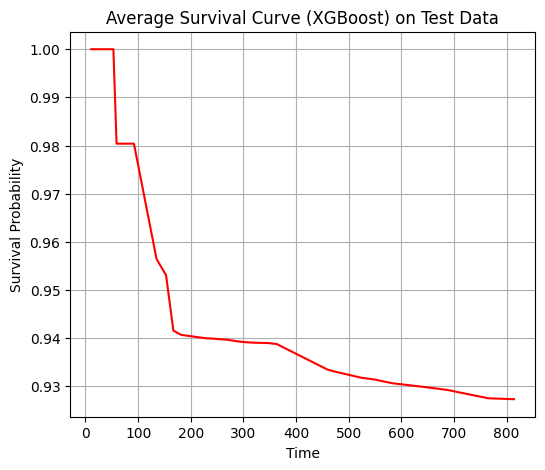

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Survival curves for XGBoost model
# Need predicted survival probabilities for test data at eval_times
# This calculation was done in the previous IBS cell and stored in predicted_survival_xgboost
# Assuming predicted_survival_xgboost is available from the previous cell execution

# If running this cell independently, recalculate predicted_survival_xgboost
if 'predicted_survival_xgboost' not in locals():
    print("predicted_survival_xgboost not found, recalculating...")
    # Recalculate necessary components to get predicted_survival_xgboost
    # This recalculation mirrors the steps in the IBS cell to get the survival probabilities

    # Get predicted log partial hazards
    test_preds_log_hazard = initial_xgb_model.predict(dtest_builtin)
    train_preds_log_hazard = initial_xgb_model.predict(dtrain_builtin)

    # Calculate hazard ratios
    test_hazard_ratios = np.exp(test_preds_log_hazard)
    train_hazard_ratios = np.exp(train_preds_log_hazard)

    # Estimate baseline cumulative hazard using the Breslow estimator manually
    train_data_baseline_manual = pd.DataFrame({
        'time': time_train.values,
        'status': status_train.values,
        'hazard_ratio': train_hazard_ratios
    })
    train_data_baseline_manual_sorted = train_data_baseline_manual.sort_values('time')
    unique_event_times = train_data_baseline_manual_sorted[train_data_baseline_manual_sorted['status'] == 1]['time'].unique()

    baseline_cumulative_hazard_values = []
    cumulative_hazard_at_prev_event = 0.0
    for event_time in unique_event_times:
        at_risk_indices = train_data_baseline_manual_sorted[train_data_baseline_manual_sorted['time'] >= event_time].index
        sum_of_hazard_ratios_at_risk = train_data_baseline_manual_sorted.loc[at_risk_indices, 'hazard_ratio'].sum()
        events_at_this_time_indices = train_data_baseline_manual_sorted[
            (train_data_baseline_manual_sorted['time'] == event_time) &
            (train_data_baseline_manual_sorted['status'] == 1)
        ].index

        epsilon = np.finfo(float).eps
        if sum_of_hazard_ratios_at_risk < epsilon:
            hazard_increment = 0.0
        else:
            hazard_increment = len(events_at_this_time_indices) / sum_of_hazard_ratios_at_risk

        cumulative_hazard_at_prev_event += hazard_increment
        baseline_cumulative_hazard_values.append(cumulative_hazard_at_prev_event)

    baseline_times = unique_event_times
    baseline_values = np.array(baseline_cumulative_hazard_values)

    if baseline_times.min() > 0:
        baseline_times = np.insert(baseline_times, 0, 0)
        baseline_values = np.insert(baseline_values, 0, 0)

    # Need get_baseline_cumulative_hazard_at_time_manual function
    def get_baseline_cumulative_hazard_at_time_manual(baseline_times, baseline_values, query_time):
        if query_time < baseline_times[0]:
            return 0.0
        if query_time >= baseline_times[-1]:
            return baseline_values[-1]

        idx = np.searchsorted(baseline_times, query_time, side='right') - 1
        t_before = baseline_times[idx]
        t_after = baseline_times[idx + 1]
        lambda_before = baseline_values[idx]
        lambda_after = baseline_values[idx + 1]

        if query_time == t_before:
            return lambda_before

        if t_after - t_before == 0:
            return lambda_before
        else:
            return lambda_before + (lambda_after - lambda_before) * (query_time - t_before) / (t_after - t_before)

    # Need eval_times
    if 'eval_times' not in locals():
         print("eval_times not found, defining default range...")
         eval_times = np.linspace(0, max(time_test), 100)


    # Calculate predicted survival probabilities
    predicted_survival_xgboost = np.zeros((len(X_test), len(eval_times)))
    for i, t in enumerate(eval_times):
        lambda0_t = get_baseline_cumulative_hazard_at_time_manual(baseline_times, baseline_values, t)
        predicted_survival_xgboost[:, i] = np.exp(-lambda0_t * test_hazard_ratios)


# predicted_survival_xgboost has individuals as rows and times as columns
# Transpose to have times as index and individuals as columns for easier plotting
predicted_survival_xgboost_plot_df = pd.DataFrame(predicted_survival_xgboost.T,
                                                  index=eval_times,
                                                  columns=X_test.index)


# Calculate the mean survival probability across individuals for each time point
average_surv_xgboost = predicted_survival_xgboost_plot_df.mean(axis=1)

# Prepare data for plotting
surv_data_xgboost = pd.DataFrame({
    'time': average_surv_xgboost.index, # Times are the index of the Series
    'surv': average_surv_xgboost.values
})

# Plot the average survival curve using seaborn and matplotlib
plt.figure(figsize=(6, 5))
sns.lineplot(data=surv_data_xgboost, x='time', y='surv', color='red')
plt.title("Average Survival Curve (XGBoost) on Test Data")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

### Variable Importance

Examine the importance of features in the trained XGBoost model. XGBoost provides different types of feature importance (e.g., 'weight', 'gain', 'cover'). 'Gain' is often the most relevant as it represents the average gain of splits using the feature.

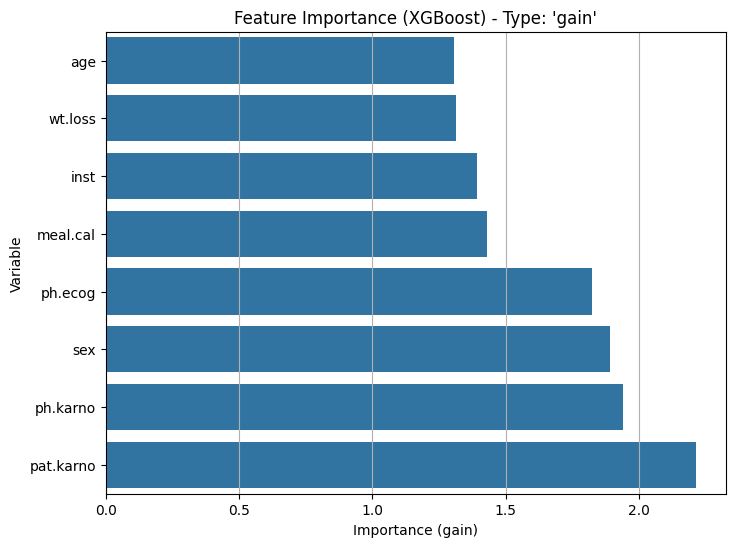

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Variable importance for XGBoost model

# Get feature importances from the trained XGBoost model
# Specify importance_type, e.g., 'weight', 'gain', 'cover', 'total_gain', 'total_cover'
importance_type = 'gain'
# Check if initial_xgb_model is available
if 'initial_xgb_model' not in locals():
    print("Error: initial_xgb_model not found. Please train the XGBoost model first.")
else:
    importance_xgb = initial_xgb_model.get_score(importance_type=importance_type)

    # Convert the importance dictionary to a pandas DataFrame for plotting
    # The keys are feature names (or f0, f1, ... if feature_names were not provided to DMatrix)
    # The values are the importance scores
    imp_data_xgb = pd.DataFrame({
        'Variable': list(importance_xgb.keys()),
        'Importance': list(importance_xgb.values())
    })

    # Sort by importance for better visualization
    imp_data_xgb = imp_data_xgb.sort_values('Importance', ascending=True)

    # Map feature names if they are f0, f1, ...
    # We can use the column names from X_train
    # Check if X_train is available
    if 'X_train' not in locals():
         print("Error: X_train not found. Cannot map feature names.")
         # Skip mapping if X_train is not available
    else:
        feature_names = X_train.columns.tolist()
        imp_data_xgb['Variable'] = imp_data_xgb['Variable'].apply(lambda x: feature_names[int(x.replace('f', ''))] if x.startswith('f') and x.replace('f', '').isdigit() and int(x.replace('f', '')) < len(feature_names) else x)


    # Plot variable importance using seaborn and matplotlib
    plt.figure(figsize=(8, 6))
    # Removed the deprecated 'palette' argument when hue is not used
    sns.barplot(data=imp_data_xgb, x='Importance', y='Variable')
    plt.title(f"Feature Importance (XGBoost) - Type: '{importance_type}'")
    plt.xlabel(f"Importance ({importance_type})")
    plt.ylabel("Variable")
    plt.grid(axis='x')
    plt.show()

## Summary and Conclusions

This notebook explores the application of a Cox Proportional Hazards-Based Gradient Boosting model using the XGBoost library for survival analysis, utilizing the lung cancer dataset. The process began with loading and preparing the data, splitting it into training and testing sets, and organizing the time-to-event, event status, and predictor variables appropriately for survival modeling. The core of the analysis involved training an XGBoost model configured with the survival:cox objective function, which is specifically designed to handle censored survival data by optimizing an approximation of the Cox partial log-likelihood.

Following model training, the notebook focused on evaluating the model's performance. This included calculating the Concordance Index (C-index) to assess the model's ability to rank individuals by their predicted risk, resulting in C-indices of 0.437 on the training set and 0.498 on the test set. Additionally, the Integrated Brier Score (IBS) was computed on the test set (0.524) to quantify the accuracy of the predicted survival probabilities over time. The notebook also visualized the average survival curve on the test data and examined the importance of different features in the model, identifying 'pat.karno' and 'ph.karno' as the most influential predictors. The initial evaluation metrics suggest that the model's predictive performance could be improved through further tuning or alternative approaches.

## References


1. **Binder, H., & Schumacher, M. (2008).** "Allowing for mandatory covariates in boosting estimation of sparse and high-dimensional Cox models." *Computational Statistics & Data Analysis, 52*(7), 3671–3682.  

2. **Binder, H. (2013).** "CoxBoost: Boosting for Cox models." *R package version 1.4.* https://cran.r-project.org/package=CoxBoost  

3. **De Bin, R., et al. (2016).** "Investigating the prediction ability of survival models based on clinical and omics data." *Statistics in Medicine, 35*(29), 5310–5325.  

4. **Ma, S., & Huang, J. (2008).** "Regularized ROC method for disease classification and biomarker selection." *Bioinformatics, 24*(23), 2743–2749.  

5. **Binder, H., et al. (2009).** "Boosting for high-dimensional time-to-event data with competing risks." *Bioinformatics, 25*(7), 890–896.  


## Cox Proportional Hazards-Based Gradient Boosting Model in Python

The Cox Proportional Hazards-Based Gradient Boosting model adapts gradient boosting for survival analysis. It uses a Cox-specific objective function to handle censored data and predict risk scores, combining the flexibility of boosting with the principles of Cox regression for time-to-event outcomes in Python.